### github : https://github.com/pdeitel/IntroToPython/tree/master/examples/ch10 
### book   : http://localhost:8888/files/2241016309/Python/Python%202/Python%20Book.pdf 
            (only works in lab comp)

# Code 1:

In [1]:
from decimal import Decimal

class Account:                                               #Account class for maintaining a bank account balance.
    
    def __init__(self, name, balance):                       #Initialize an Account object.(_<name>_ is a special function)
        if balance < Decimal('0.00'):                        #if balance is less than 0.00, raise an exception
            raise ValueError('Initial balance must be >= to 0.00.')

        self.name = name
        self.balance = balance

    def deposit(self, amount):                               #Deposit money to the account.
        if amount < Decimal('0.00'):                         # if amount is less than 0.00, raise an exception
            raise ValueError('amount must be positive.')

        self.balance += amount
    
    def withdraw(self, amount):
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')
        self.balance -= amount
        
    def showBalance(self):
        print("Current Account Balance: ", self.balance)

In [2]:
account1 = Account('John', 1000)

In [3]:
account1.deposit(Decimal('1000.00'))
print(account1.balance)

2000.00


In [4]:
account1.withdraw(Decimal('20000.00'))
print(account1.balance)

-18000.00


In [5]:
account1.showBalance()

Current Account Balance:  -18000.00


# Code 2:
[ restart kernel here ]

In [1]:
class Time:
    """Class Time with read-write properties."""
    
    def __init__(self, hour=0, minute=0, second=0):
        """Initialize each attribute."""
        self.hour = hour # 0-23
        self.minute = minute # 0-59
        self.second = second # 0-59
        
    @property
    def hour(self):
        """Return the hour."""
        return self._hour

    @hour.setter
    def hour(self, hour):
        """Set the hour."""
        if not (0 <= hour < 24):
            raise ValueError(f'Hour ({hour}) must be 0-23')
        self._hour = hour
    
    @property
    def minute(self):
        """Return the minute."""
        return self._minute
    
    @minute.setter
    def minute(self, minute):
        """Set the minute."""
        if not (0 <= minute < 60):
            raise ValueError(f'Minute ({minute}) must be 0-59')

        self._minute = minute

    @property
    def second(self):
        """Return the second."""
        return self._second

    @second.setter
    def second(self, second):
        """Set the second."""
        if not (0 <= second < 60):
            raise ValueError(f'Second ({second}) must be 0-59')

        self._second = second

    def set_time(self, hour=0, minute=0, second=0):
        """Set values of hour, minute, and second."""
        self.hour = hour
        self.minute = minute
        self.second = second

    def __repr__(self):
        """Return Time string for repr()."""
        return (f'Time(hour={self.hour}, minute={self.minute}, ' + 
                f'second={self.second})')

    def __str__(self):
        """Print Time in 12-hour clock format."""
        return (('12' if self.hour in (0, 12) else str(self.hour % 12)) + 
                f':{self.minute:0>2}:{self.second:0>2}' + 
                (' AM' if self.hour < 12 else ' PM'))
    @property
    def time(self):
        """Return hour, minute and second as a tuple."""
        return (self.hour, self.minute, self.second)
    
    @time.setter
    def time(self, time_tuple):
        """Set time from a tuple containing hour, minute and second."""
        self.set_time(time_tuple[0], time_tuple[1], time_tuple[2])

In [2]:
t = Time()

In [3]:
t

Time(hour=0, minute=0, second=0)

In [4]:
t.time = (12, 30, 45)

In [5]:
t

Time(hour=12, minute=30, second=45)

In [6]:
t.time

(12, 30, 45)

# Code 3:

In [7]:
class Time:
    def __init__(self, hour=0, minute=0, second=0):
        self.__hour = hour                                 #private attribute
        self.minute = minute
        
    def sum(self):
        return self.__hour             #accessing a private var

In [8]:
t1 = Time(14, 30, 45)

In [9]:
print(t1._hour)

AttributeError: 'Time' object has no attribute '_hour'

In [10]:
print(t1.minute)

30


In [11]:
print(t1.sum())

14


[ Restart Kernel Here ]
### 29 Jan, 25
# Private Attributes:

In [1]:
class PrivateClass:                         #Class with public and private attributes.
    def __init__(self):                     #Initialize the public and private attributes.
        self.public_data = "public"         # public attribute
        self.__private_data = "private"     # private attribute

In [2]:
my_object = PrivateClass()

In [3]:
my_object.public_data

'public'

In [4]:
my_object.__private_data

AttributeError: 'PrivateClass' object has no attribute '__private_data'

In [5]:
my_object._PrivateClass__private_data  #name mangling: name of pvt atrbute is changed like this

'private'

In [6]:
my_object._PrivateClass__private_data = 'modified'

In [7]:
my_object._PrivateClass__private_data

'modified'

[ Restart Kernel Here ]
# Introducing Class Attributes:

In [1]:
# card.py
# Card class that represents a playing card and its image file name.

class Card:
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    def __init__(self, face, suit):
            self._face = face           #Initialize a Card with a face and suit.
            self._suit = suit

    @property
    def face(self):  
        return self._face               #Return the Card's self._face value.

    @property
    def suit(self):
        return self._suit               #Return the Card's self._suit value.

    @property
    def image_name(self):
        return str(self).replace(' ', '_') + '.png'          #Return the Card's image file name.

    def __repr__(self):
        return f"Card(face='{self.face}', suit='{self.suit}')"     #Return string representation for repr().

    def __str__(self):
        return f'{self.face} of {self.suit}'                       #Return string representation for str().

    def __format__(self, format):
        return f'{str(self):{format}}'                     #Return formatted string representation for str().

In [2]:
# deck.py
# Deck class represents a deck of Cards.

import random 

class DeckOfCards:
    NUMBER_OF_CARDS = 52                            # constant number of Cards

    def __init__(self):                             # Initialize the deck.
        self._current_card = 0
        self._deck = []

        for count in range(DeckOfCards.NUMBER_OF_CARDS):  
            self._deck.append(Card(Card.FACES[count % 13], Card.SUITS[count // 13]))

    def shuffle(self):
        self._current_card = 0
        random.shuffle(self._deck)

    def deal_card(self):
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:
            return None

    def __str__(self):
        #Return a string representation of the current _deck.
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s

In [3]:
deck_of_cards = DeckOfCards()

In [4]:
print(deck_of_cards)

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

In [5]:
deck_of_cards.shuffle()
print(deck_of_cards)

6 of Clubs         9 of Diamonds      5 of Diamonds      4 of Clubs         
9 of Spades        King of Clubs      3 of Spades        Queen of Hearts    
Jack of Spades     7 of Hearts        10 of Spades       8 of Hearts        
10 of Clubs        7 of Spades        8 of Clubs         2 of Hearts        
4 of Spades        8 of Spades        2 of Clubs         7 of Clubs         
3 of Hearts        Jack of Hearts     Ace of Diamonds    10 of Hearts       
2 of Diamonds      Jack of Clubs      Jack of Diamonds   5 of Hearts        
7 of Diamonds      Queen of Spades    Ace of Spades      2 of Spades        
4 of Hearts        6 of Spades        King of Hearts     9 of Hearts        
Ace of Hearts      6 of Diamonds      3 of Clubs         3 of Diamonds      
King of Diamonds   6 of Hearts        4 of Diamonds      Queen of Clubs     
9 of Clubs         Queen of Diamonds  5 of Clubs         5 of Spades        
Ace of Clubs       8 of Diamonds      10 of Diamonds     King of Spades     

In [6]:
deck_of_cards.deal_card()

Card(face='6', suit='Clubs')

In [7]:
card = deck_of_cards.deal_card()
str(card)

'9 of Diamonds'

In [8]:
card.image_name

'9_of_Diamonds.png'

[ Restart Kernel Here ]
### 30 Jan, 25
# Inheritance: 

### Sub class inherits base class' methods and data

### Building an Inheritance Hierarchy; Introducing Polymorphism

In [1]:
# commmissionemployee.py
"""CommissionEmployee base class."""
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales  # validate via property
        self.commission_rate = commission_rate  # validate via property

    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn

    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid."""
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')
        
        self._gross_sales = sales
        
    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError(
               'Interest rate must be greater than 0 and less than 1')
        
        self._commission_rate = rate

    def earnings(self):
        """Calculate earnings."""   
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        """Return string representation for repr()."""
        return ('CommissionEmployee: ' + 
            f'{self.first_name} {self.last_name}\n' +
            f'social security number: {self.ssn}\n' +
            f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')

# All Classes Inherit Directly or Indirectly from Class `object`

In [2]:
# basepluscommissionemployee.py
"""SalariedCommissionEmployee derived from CommissionEmployee."""
class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus 
    commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate, base_salary):
        """Initialize SalariedCommissionEmployee's attributes."""
        super().__init__(first_name, last_name, ssn, 
                         gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property

    @property
    def base_salary(self):
        return self._base_salary

    @base_salary.setter
    def base_salary(self, salary):
        """Set base salary or raise ValueError if invalid."""
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')
        
        self._base_salary = salary

    def earnings(self):
        """Calculate earnings."""   
        return super().earnings() + self.base_salary

    def __repr__(self):
        """Return string representation for repr()."""
        return ('Salaried' + super().__repr__() +      
            f'\nbase salary: {self.base_salary:.2f}')


# Inheriting from Class `CommissionEmployee`
# Method `__init__` and Built-In Function `super` 
# Overriding Method `earnings`
# Overriding Method `__repr__`

### Testing Class `CommissionEmployee`

In [3]:
# from commissionemployee import CommissionEmployee
# from decimal import Decimal

In [4]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('10000.00'), Decimal('0.06'))

In [5]:
c

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06

In [6]:
print(f'{c.earnings():,.2f}')

600.00


In [7]:
c.gross_sales = Decimal('20000.00')
c.commission_rate = Decimal('0.1')
print(f'{c.earnings():,.2f}')

2,000.00


### Testing Class `SalariedCommissionEmployee` 

In [8]:
# from salariedcommissionemployee import SalariedCommissionEmployee

In [9]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
         Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))
print(s.first_name, s.last_name, s.ssn, s.gross_sales, 
       s.commission_rate, s.base_salary)

Bob Lewis 444-44-4444 5000.00 0.04 300.00


In [10]:
print(f'{s.earnings():,.2f}')

500.00


In [11]:
s.gross_sales = Decimal('10000.00')
s.commission_rate = Decimal('0.05')
s.base_salary = Decimal('1000.00')
print(s)

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00


In [12]:
print(f'{s.earnings():,.2f}')

1,500.00


### Testing the “is a” Relationship

In [13]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

True

In [14]:
isinstance(s, CommissionEmployee)

True

In [15]:
isinstance(s, SalariedCommissionEmployee)

True

# Duck Typing and Polymorphism
## [same function call by unrelated classes]

In [16]:
class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    def earnings(self):
        return Decimal('1_000_000.00')

In [17]:
# from decimal import Decimal
# from commissionemployee import CommissionEmployee
# from salariedcommissionemployee import SalariedCommissionEmployee

In [18]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('10000.00'), Decimal('0.06'))

s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

d = WellPaidDuck()

employees = [c, s, d]

# Processing CommissionEmployees and SalariedCommissionEmployees Polymorphically

for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00

I am a well-paid duck
1,000,000.00



In [19]:
random = [1, 2.5, "abc"]
for v in random:
    print(v)
    print(type(v))

1
<class 'int'>
2.5
<class 'float'>
abc
<class 'str'>


# Operator Overloading
[Restart Kernel Here]

In [1]:
# complexnumber.py
"""Complex class with overloaded operators."""

class Complex:
    """Complex class that represents a complex number 
    with real and imaginary parts."""

    def __init__(self, real, imaginary):
        """Initialize Complex class's attributes."""
        self.real = real
        self.imaginary = imaginary
        
    #Overloaded + Operator
    def __add__(self, right):
        """Overrides the + operator."""
        return Complex(self.real + right.real, self.imaginary + right.imaginary)
    
    def __iadd__(self, right):
        """Overrides the += operator."""
        self.real += right.real
        self.imaginary += right.imaginary
        return self
    
    def __sub__(self, right):
        """Overrides the - operator."""
        return Complex(self.real - right.real, self.imaginary - right.imaginary)

    def __isub__(self, right):
        """Overrides the -= operator."""
        self.real -= right.real
        self.imaginary -= right.imaginary
        return self

    #Method __repr__
    def __repr__(self):
        return (f'({self.real} ' + ('+' if self.imaginary >= 0 else '-') + f' {abs(self.imaginary)}i)')

In [2]:
x = Complex(real=2, imaginary=4)

y = Complex(real=5, imaginary=-1)

In [3]:
x+y

(7 + 3i)

In [4]:
x-y

(-3 + 5i)

In [5]:
x

(2 + 4i)

In [6]:
y

(5 - 1i)

# Named Tupple
[ Restart Kernel Here ]

In [1]:
from collections import namedtuple
Card = namedtuple('Card', ['face', 'suit'])
card = Card(face='Ace', suit='Spades')

In [2]:
card.face

'Ace'

In [3]:
 card.suit

'Spades'

In [4]:
card

Card(face='Ace', suit='Spades')

In [5]:
values = ['Queen', 'Hearts']
card = Card._make(values)
card

Card(face='Queen', suit='Hearts')

In [6]:
 card._asdict()

{'face': 'Queen', 'suit': 'Hearts'}

In [7]:
Time = namedtuple('Time', ['hour', 'minute', 'second'])
t = Time(13, 30, 45)
print(t.hour, t.minute, t.second)
t

13 30 45


Time(hour=13, minute=30, second=45)

In [8]:
card[0]

'Queen'

# Python 3.7’s New Data Classes
[ Restart Kernel Here ]

In [1]:
# carddataclass.py
"""Card data class with class attributes, data attributes, 
autogenerated methods and explicitly defined methods."""
from dataclasses import dataclass
from typing import ClassVar, List

@dataclass
class Card:
    FACES: ClassVar[List[str]] = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS: ClassVar[List[str]] = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    face: str
    suit: str

    #defining property and other methods:
    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'

    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'

In [2]:
c1 = Card(Card.FACES[0], Card.SUITS[3])

print(c1)

Ace of Spades


In [3]:
c1

Card(face='Ace', suit='Spades')

In [4]:
c1.face

'Ace'

In [5]:
c1.suit

'Spades'

In [6]:
c1.image_name

'Ace_of_Spades.png'

In [7]:
c2 = Card(Card.FACES[0], Card.SUITS[3])

c3 = Card(Card.FACES[0], Card.SUITS[0])

In [8]:
print("c1 == c2 : ", c1 == c2)
print("c1 == c3 : ", c1 == c3)
print("c1 != c3 : ", c1 != c3)

c1 == c2 :  True
c1 == c3 :  False
c1 != c3 :  True


# Unit Testing with Docstrings and doctest
[  Restart Kernel Here  ]

In [1]:
# accountdoctest.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for demonstrating doctest."""
    
    def __init__(self, name, balance):
        """Initialize an Account object.
        
        >>> account1 = Account('John Green', Decimal('50.00'))
        >>> account1.name
        'John Green'
        >>> account1.balance
        Decimal('50.00')

        The balance argument must be greater than or equal to 0.
        >>> account2 = Account('John Green', Decimal('-50.00'))
        Traceback (most recent call last):
            ...
        ValueError: Initial balance must be >= to 0.00.
        """

        # if balance is less than 0.00, raise an exception
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= to 0.00.')

        self.name = name
        self.balance = balance

    def deposit(self, amount):
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount

if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=True)

Trying:
    account1 = Account('John Green', Decimal('50.00'))
Expecting nothing
ok
Trying:
    account1.name
Expecting:
    'John Green'
ok
Trying:
    account1.balance
Expecting:
    Decimal('50.00')
ok
Trying:
    account2 = Account('John Green', Decimal('-50.00'))
Expecting:
    Traceback (most recent call last):
        ...
    ValueError: Initial balance must be >= to 0.00.
ok
3 items had no tests:
    __main__
    __main__.Account
    __main__.Account.deposit
1 items passed all tests:
   4 tests in __main__.Account.__init__
4 tests in 4 items.
4 passed and 0 failed.
Test passed.


# Key Points and Concepts:
<B>1. Namespaces and Scopes:</B>  
A <B>namespace</B> maps identifiers (like variable names) to objects. It's implemented as a
dictionary in Python. There are four primary types:
* Local: Exists within functions/methods and stores their local variables.
* Global: Exists for a module and stores its global variables.
* Built-in: Contains built-in functions and types (like print and int).
* Enclosing: Found in nested functions.
  
<B>2. Search Order (LEGB Rule)</B>   
Python resolves variable names in the following order:
* Local
* Enclosing (in nested functions)
* Global
* Built-in
  
<B>3. Shadowing</B>  
If you define a variable with the same name as a built-in, local, or global variable, it
"shadows" that variable in the namespace.
  
<B>4. Class and Object Namespaces</B>  
Class attributes are stored in the class namespace, while object attributes are stored in
the object namespace. 

## Sample Code:-
### [ Restart Kernel Here ]
### Local, Global, and Built-in Namespaces:

In [1]:
x = "global x"                   # Global namespace
def print_variables():
    x = "local x"                # Local namespace
    print(x)                     # Uses the local x
print_variables()                # Output: local x
print(x)                         # Output: global x

local x
global x


### LEGB Rule with Nested Functions:

In [2]:
def outer_function():
    x = "enclosing x"           # Enclosing namespace
    def inner_function():
        x = "local x"           # Local namespace
        print(x)
    inner_function()
outer_function()                # Output: local x 

local x


### Shadowing Example:

In [3]:
def print(): 
    print("This shadows the built-in print function")
    
# Uncommenting the below line will raise an error
# print("Hello")                        # TypeError: 'NoneType' object is not callable

# Restore built-in print by deleting the shadowed version
del print
print("Restored built-in print")        # Output: Restored built-in print

Restored built-in print


In [4]:
def sum(x, y):
    z = x-y;
    print(z);
    
x = 5;
y = 7;
sum(x, y)

-2


### Class and Object Namespaces:

In [5]:
class MyClass:
    class_attr = "I am a class attribute"
    
    def __init__(self, value):
        self.instance_attr = value                    # Object namespace
        
obj = MyClass("I am an instance attribute")
print(obj.class_attr)                                 # Output: I am a class attribute
print(MyClass.class_attr)
print(obj.instance_attr)                              # Output: I am an instance attribute

I am a class attribute
I am a class attribute
I am an instance attribute


### [ Restart Kernel Here ]¶  
## 1. Time Series  
A <b>time series</b> is a sequence of data points ordered by time. These can be univariate (single observation per time point) or multivariate (multiple observations per time point).  

<b>Example: Creating and plotting a simple time series</b>   

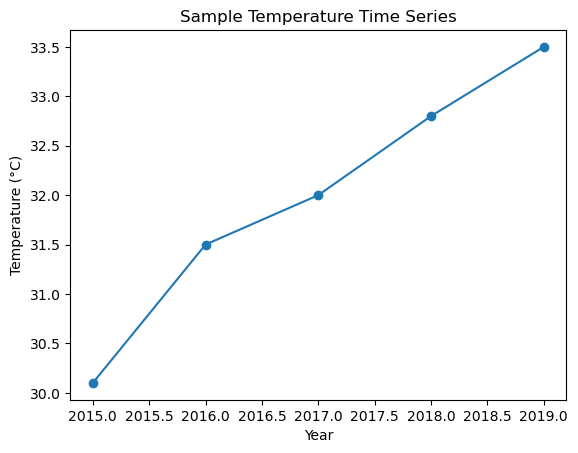

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series data
data = {'Year': [2015, 2016, 2017, 2018, 2019], 'Temperature': [30.1, 31.5, 32.0, 32.8, 33.5]}
df = pd.DataFrame(data)

# Plotting the time series
plt.plot(df['Year'], df['Temperature'], marker='o')
plt.title('Sample Temperature Time Series')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

### [ Restart Kernel Here ]¶  
## 2. Simple Linear Regression
Simple linear regression finds a <b>linear relationship</b> between an <b>independent variable (x)</b> and a <b>dependent variable (y).  </b>  
  
<b>Formula:</b>    
<center><b>y=mx+by = mx + by=mx+b</b></center>  
  
Where:  
* m: Slope of the line
* b: Intercept
* x: Independent variable
* y: Dependent variable
  
### Example: Simple linear regression using linregress : 

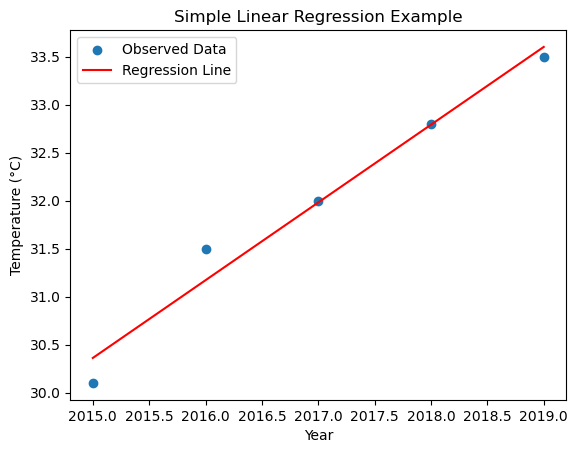

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data
data = {'Year': [2015, 2016, 2017, 2018, 2019],
 'Temperature': [30.1, 31.5, 32.0, 32.8, 33.5]}
df = pd.DataFrame(data)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'],
df['Temperature'])

# Make predictions
df['Predicted_Temperature'] = slope * df['Year'] + intercept

# Plot the data and regression line
plt.scatter(df['Year'], df['Temperature'], label='Observed Data')
plt.plot(df['Year'], df['Predicted_Temperature'], color='red',
label='Regression Line')
plt.legend()
plt.title('Simple Linear Regression Example')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show() 
# plt.savefig("D:\...", dpi=500) #to download the graph

## 3. Loading and Cleaning Data  
Often, data cleaning involves renaming columns and converting data types for easier analysis.  
### Example: Loading and cleaning CSV data:  

In [2]:
# Load data from CSV file
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Rename column for better readability
df.rename(columns={'Value': 'Temperature'}, inplace=True)

# Convert 'Date' to year format by integer division
df['Year'] = df['Date'] // 100
print(df.head())

     Date  Temperature  Anomaly  Year
0  189501         34.2     -3.2  1895
1  189601         34.7     -2.7  1896
2  189701         35.5     -1.9  1897
3  189801         39.6      2.2  1898
4  189901         36.4     -1.0  1899


## 4. Descriptive Statistics   
Use <b>.describe()</b> to get a summary of key statistics for a DataFrame.  
### Example: Quick statistics:  

In [3]:
print(df['Temperature'].describe())

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64


## 5. Forecasting Future Values  
Use the regression equation (y=mx+b)(y = mx + b)(y=mx+b) to predict future values.  
### Example: Forecasting a future temperature:  
```python
# Forecast temperature for 2025
year = 2025
predicted_temperature = slope * year + intercept
print(f'Predicted January high temperature for {year}:
{predicted_temperature:.2f}°F')
```
  
<hr>  
  
## 6. Plotting with Seaborn
Seaborn provides a high-level interface for creating plots, including regression plots.  
### Example: Regression plot with Seaborn:
```python
import seaborn as sns

# Regression plot
sns.regplot(x='Year', y='Temperature', data=df)
plt.title('Regression Plot of January Temperatures')
plt.show()
```
  
    
### Key Takeaways:
1. <b>Time series data</b> is essential for trend analysis and forecasting.
1. <b>Simple linear regression</b> fits a straight line to predict outcomes based on independent variables.
1. <b>Data cleaning</b> ensures better readability and processing efficiency.
1. <b>Descriptive statistics</b> provide insights into the data.
1. <b>Forecasting</b> uses regression to estimate future values.
1. <b>Visualization</b> with Seaborn enhances data interpretation. 